In [24]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

%matplotlib inline

In [42]:
f = r.TFile("/home/jlab/ExternalDrive/Seagate/Data/new_unpacked/output_40_18433_00055.root")
run_num = 18433
subRun_num = "00055"

In [43]:
f.cd("islands")
f.cd("islands/islands")

True

In [44]:
f.ls()

TFile**		/home/jlab/ExternalDrive/Seagate/Data/new_unpacked/output_40_18433_00055.root	
 TFile*		/home/jlab/ExternalDrive/Seagate/Data/new_unpacked/output_40_18433_00055.root	
  TDirectoryFile*		islands	islands (CaloIslandAnalyzer) folder
   TDirectoryFile*		islands	islands
    KEY: TTree	islandTree;2	Tree of xtal traces
    KEY: TTree	islandTree;1	Tree of xtal traces
   KEY: TDirectoryFile	islands;1	islands
   KEY: TDirectoryFile	fill2;1	fill2/calo2
   KEY: TDirectoryFile	fill5;1	fill5/calo2
   KEY: TDirectoryFile	fill7;1	fill7/calo2
   KEY: TDirectoryFile	fill9;1	fill9/calo2
   KEY: TDirectoryFile	fill11;1	fill11/calo2
   KEY: TDirectoryFile	fill13;1	fill13/calo2
   KEY: TDirectoryFile	fill15;1	fill15/calo2
   KEY: TDirectoryFile	fill17;1	fill17/calo2
   KEY: TDirectoryFile	fill19;1	fill19/calo2
   KEY: TDirectoryFile	fill22;1	fill22/calo2
   KEY: TDirectoryFile	fill24;1	fill24/calo2
   KEY: TDirectoryFile	fill26;1	fill26/calo2
   KEY: TDirectoryFile	fill28;1	fill28/calo2
   KEY: TDi

In [45]:
t = f.Get("islands/islands/islandTree")
#t.Print()

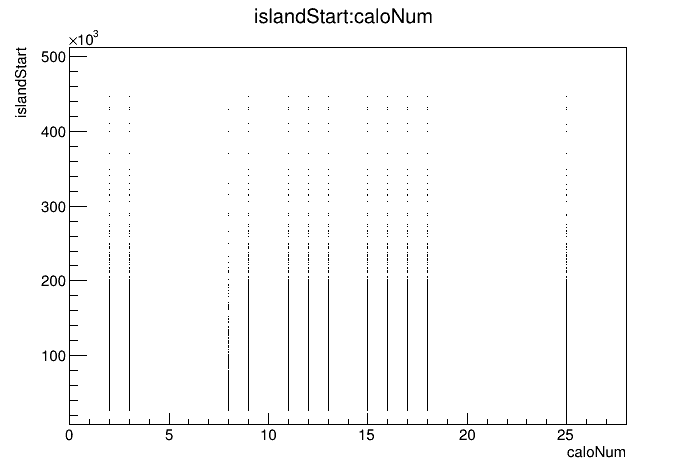

In [46]:
c = r.TCanvas()
t.Draw("islandStart:caloNum")
c.Draw()

In [47]:
print(t.GetEntries())

16446


1
2
Entry # 5362


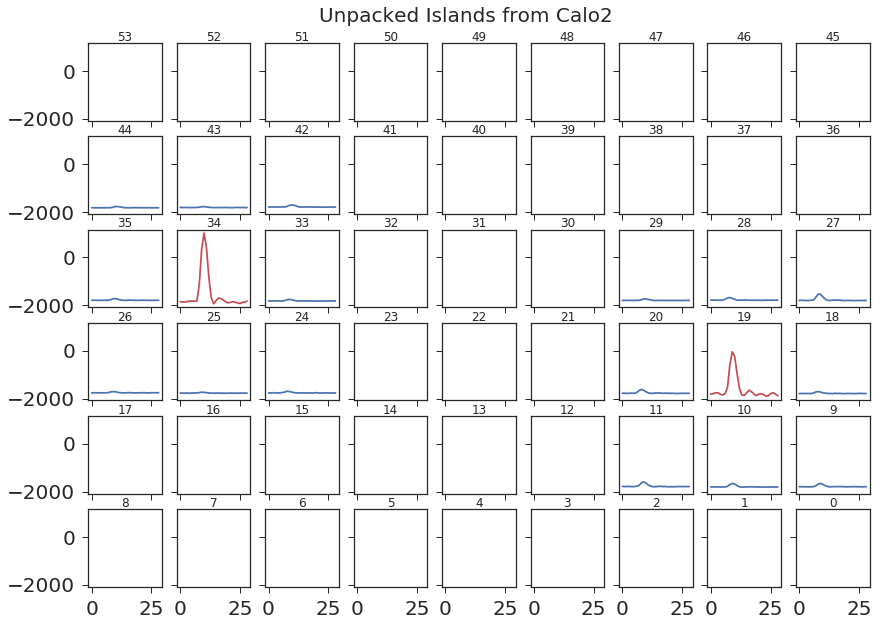

3
Entry # 5427


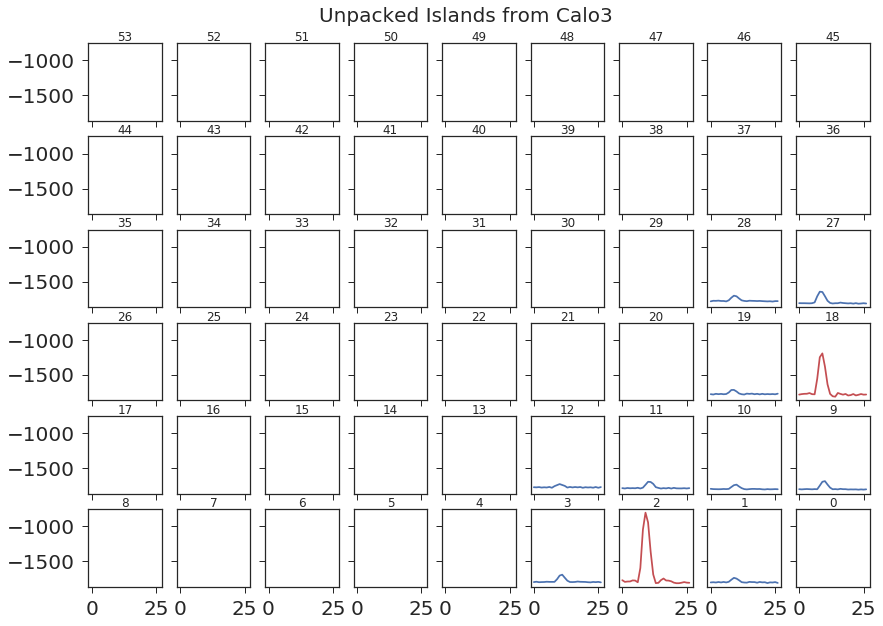

4
5
6
7
8
Entry # 5492


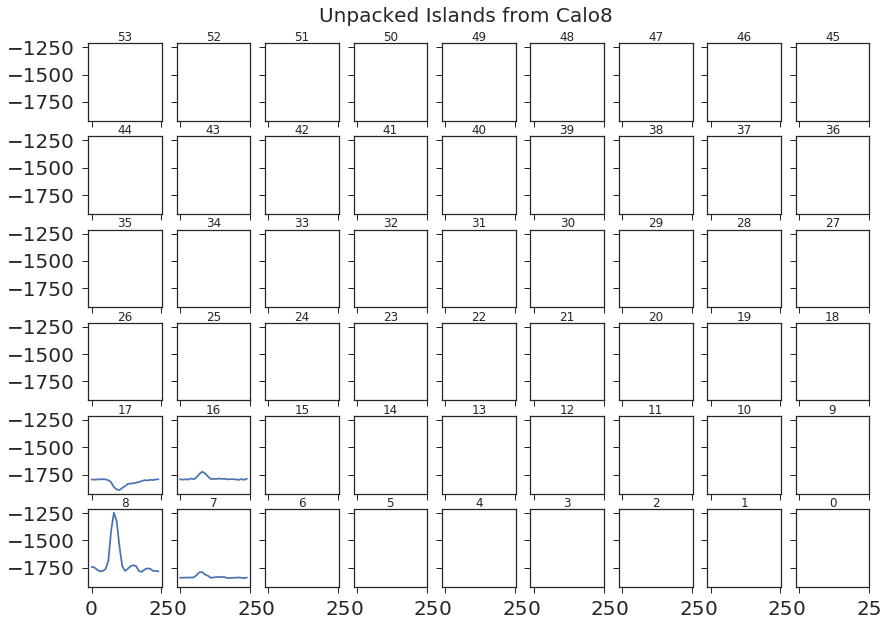

9
Entry # 5502


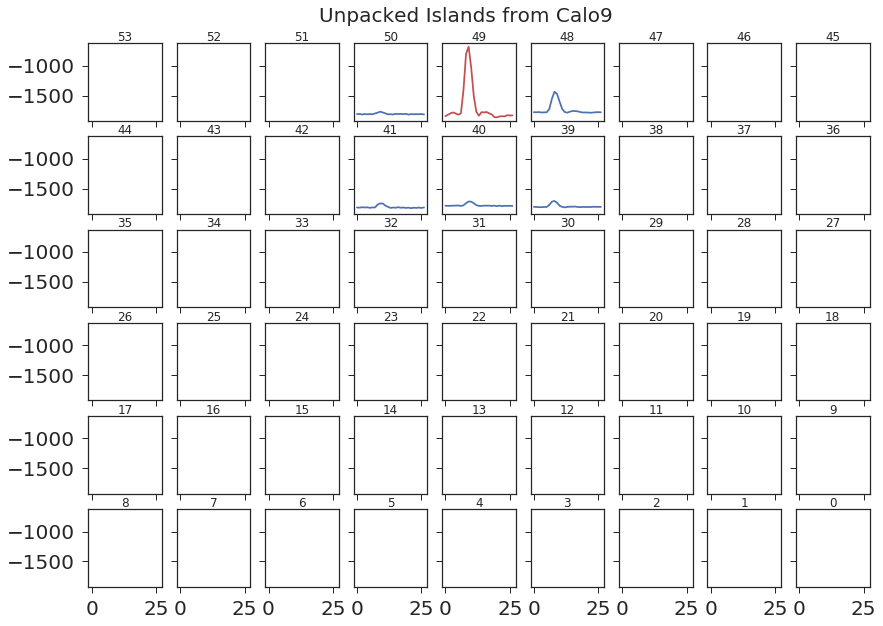

10
11
Entry # 5567


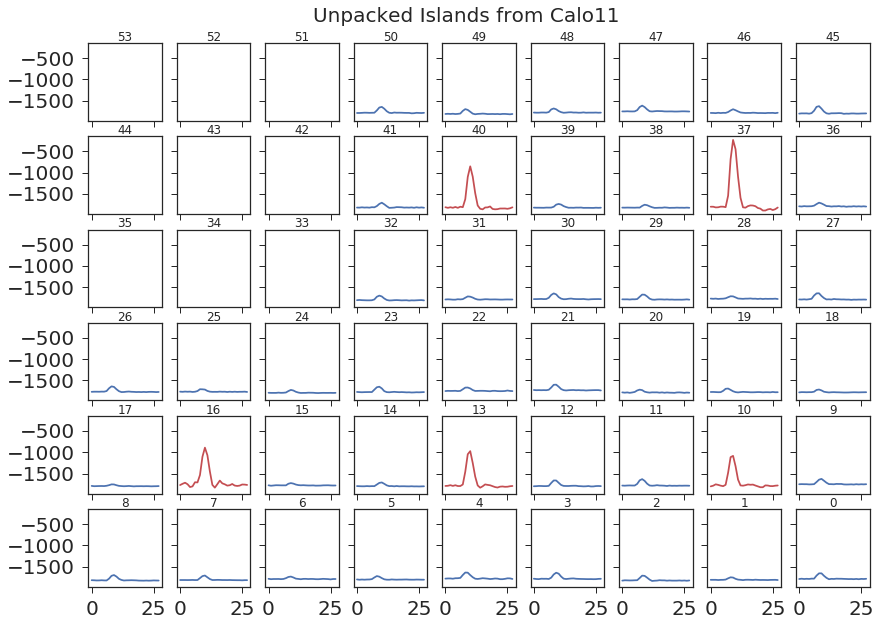

12
Entry # 5632


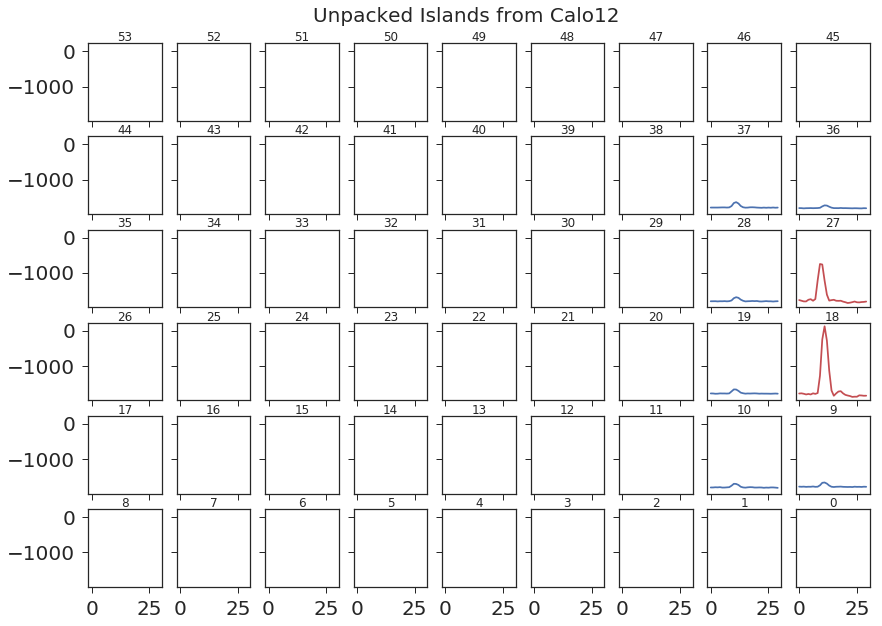

13
Entry # 5697


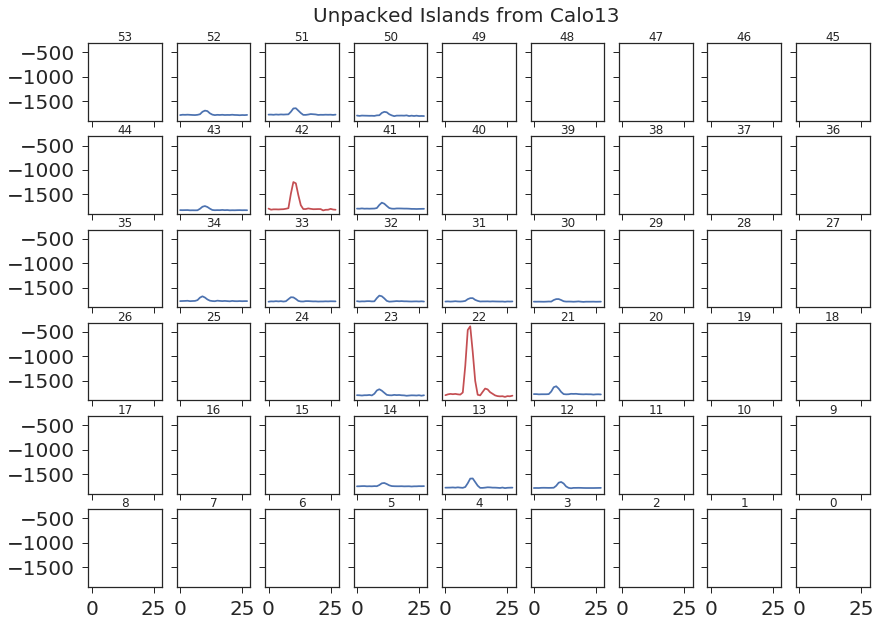

14
15
Entry # 5001


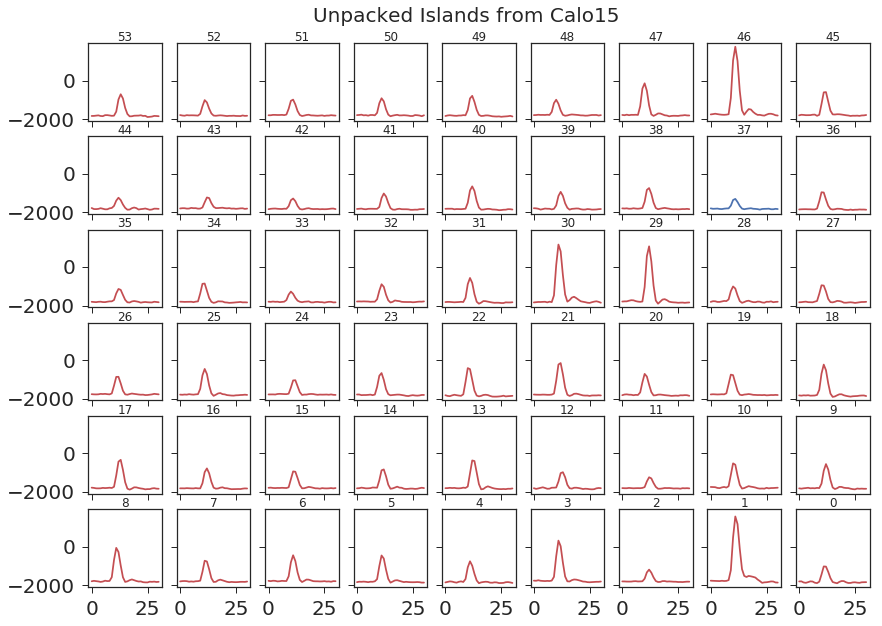

16
Entry # 5040


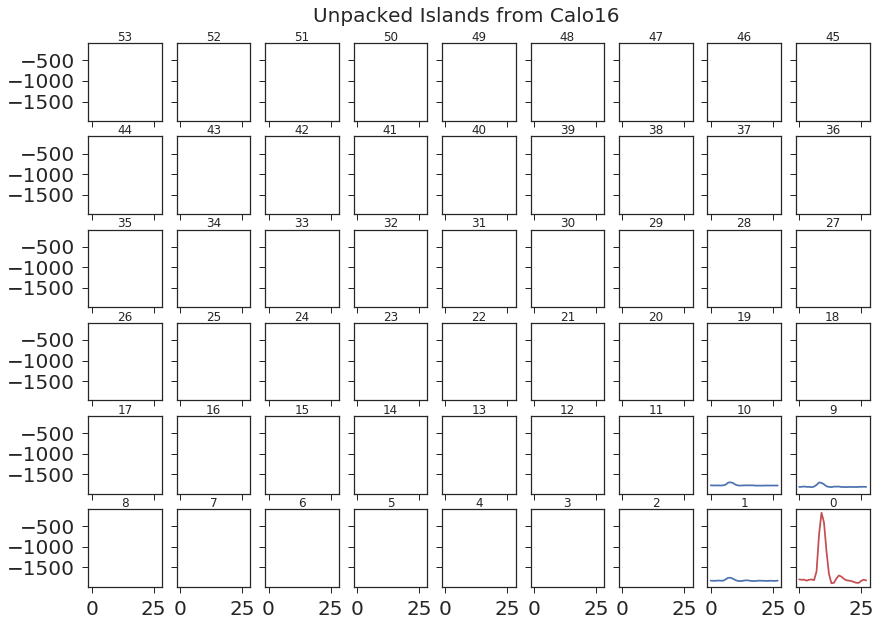

17
Entry # 5123


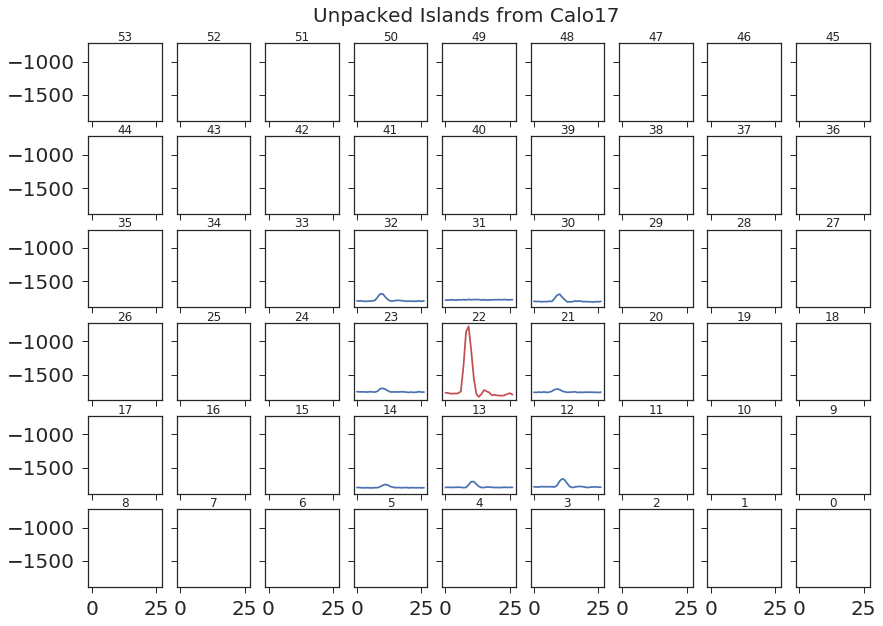

18
Entry # 5206


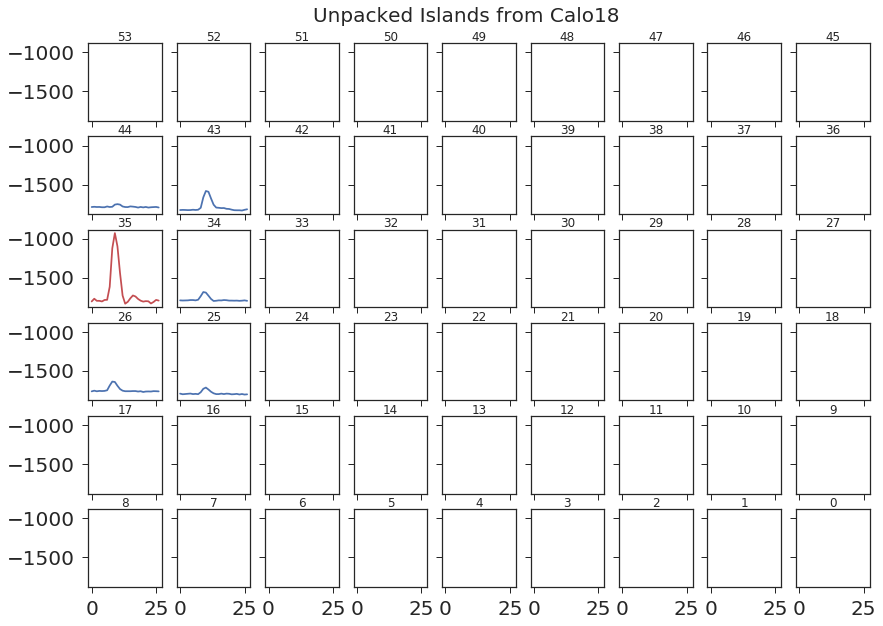

19
20
21
22
23
24


In [49]:
for caloNum in range(1,25):
    counter = 0
    print(caloNum)
    for i,entry in enumerate(t):
        if(int(t.caloNum) == caloNum):
            if i < 5000:
                continue
            if counter > 0:
                break
            counter = counter + 1

            fig, axarr = plt.subplots(6,9, sharey=True, sharex=True,figsize=(14, 10))
            print("Entry #", i+1)
            plotVec = []
            for crystal in range(0,54):
                branchString = "t.xtal"+str(crystal)
                entryVeci = []
                rootVec = eval(branchString)# t.xtal53
                length = rootVec.size()
    #            print("     Crystal",crystal,"has length [("+branchString+").size()]", length)
                for ding in range(length):
                    entryVeci.append( rootVec[ding] )
                plotVec.append(entryVeci)

            plotVec.reverse()
            list1 = []
            list2 = []
            xtal = []
            list2xtal = []
            for crystal in range(54):
                list2.append(plotVec[crystal]) 
                list2xtal.append(crystal)
                if (crystal+1) % 9 == 0: #split into 9 column blocks
                    list1.append(list2)
                    list2 = []
                    list2xtal.reverse()
                    xtal.append(list2xtal)
                    list2xtal = []
            xtal.reverse()


            for ding in range(9):
                for j in range(6):
                    if(len(list1[j][ding]) < 1):
                        axarr[j,ding].plot(list1[j][ding],color='g') 
                    elif(np.abs( (list1[j][ding])[0] - np.max(list1[j][ding]) ) > 500):
                        axarr[j,ding].plot(list1[j][ding],color='r') 
                    else:
                        axarr[j,ding].plot(list1[j][ding],color='b') 
                    axarr[j,ding].set_title(str(xtal[j][ding]),y = 0.95)
#                    axarr[j,ding].set_yticklabels([])
#                    axarr[j,ding].set_xticklabels([])

            plt.suptitle("Unpacked Islands from Calo"+str(t.caloNum),y = 0.93, fontsize=20)
            #fig.tight_layout()

#            plt.savefig("./images/UnpackedIslands_calo"+str(t.caloNum).zfill(2)+"_run18433_subRun"+subRun_num+"_entry"+str(i)
#                        +".png",bbox_inches='tight')
            plt.show()